In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv')

In [22]:
data.head()

,Entity,Code,Year,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
0,Afghanistan,AFG,2010,0.21
1,Afghanistan,AFG,2015,0.21
2,Afghanistan,AFG,2018,0.21
3,Albania,ALB,2000,6.57
4,Albania,ALB,2005,7.65


In [23]:
data.isna().sum()

Entity                                                                                                   0
Code                                                                                                    70
Year                                                                                                     0
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)     0
dtype: int64

In [24]:
data.dtypes
data.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Asia and Pacific',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Europe and Central Asia',
       'European Union', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 

In [25]:
data.Entity.value_counts()

Libya          5
Nauru          5
Netherlands    5
New Zealand    5
Nicaragua      5
              ..
Serbia         3
Montenegro     3
Canada         3
Afghanistan    3
Sudan          2
Name: Entity, Length: 202, dtype: int64

In [26]:
data.describe()
data.columns

Index(['Entity', 'Code', 'Year',
       'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'],
      dtype='object')

In [27]:
data.rename(columns={'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)': 'consumption'}, inplace=True)
data

,Entity,Code,Year,consumption
0,Afghanistan,AFG,2010,0.21
1,Afghanistan,AFG,2015,0.21
2,Afghanistan,AFG,2018,0.21
3,Albania,ALB,2000,6.57
4,Albania,ALB,2005,7.65
...,...,...,...,...
994,Zimbabwe,ZWE,2000,2.46
995,Zimbabwe,ZWE,2005,2.77
996,Zimbabwe,ZWE,2010,3.93
997,Zimbabwe,ZWE,2015,4.92


In [28]:
data_coutry = data.groupby('Entity').agg(mean_consumption = ('consumption',np.mean), max_consumption = ('consumption',np.max))
data_coutry

,mean_consumption,max_consumption
Entity,,
Afghanistan,0.210000,0.210000
Albania,7.164000,7.690000
Algeria,0.784000,0.950000
Andorra,11.794000,13.280000
Angola,6.142000,8.160000
...,...,...
Vietnam,5.252000,8.660000
World,5.936505,6.298955
Yemen,0.283200,0.790000


In [29]:
data_coutry.loc['Poland']
polska = data.loc[data.Entity=='Poland']
niemcy = data.loc[data.Entity=='Germany']
European_Union = data.loc[data.Entity=='European Union']
USA = data.loc[data.Entity=='United States']

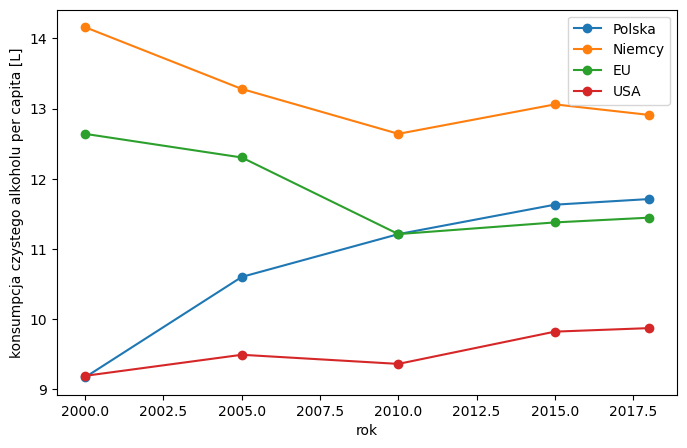

In [37]:
plt.rcParams["figure.figsize"] = (8,5)

plt.plot(polska.Year, polska.consumption, '-o', label = 'Polska')
plt.plot(niemcy.Year, niemcy.consumption, '-o', label = 'Niemcy')
plt.plot(European_Union.Year, European_Union.consumption, '-o', label = 'EU')
plt.plot(USA.Year, USA.consumption, '-o', label = 'USA')
plt.legend()
plt.xlabel('rok')
plt.ylabel('konsumpcja czystego alkoholu per capita [L]')
plt.show()
#rośniemy w siłę

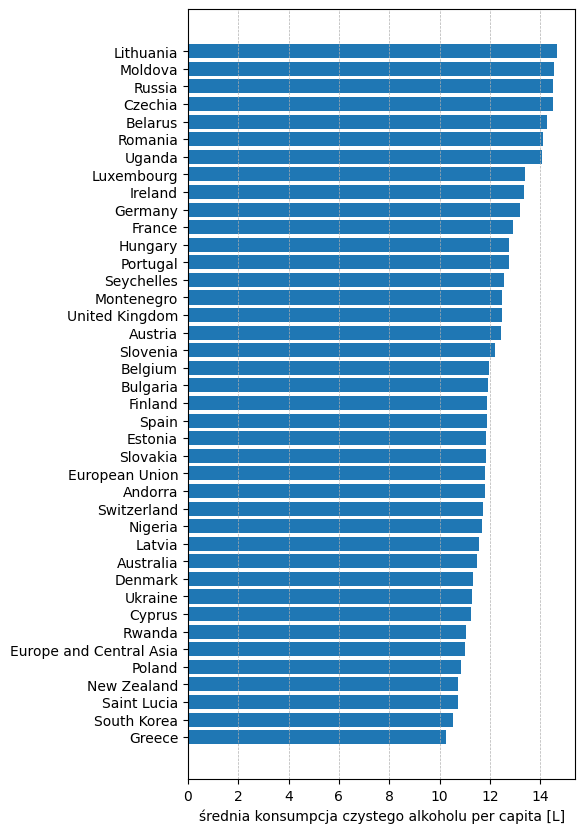

In [40]:
data_coutry_sorted = data_coutry.sort_values('mean_consumption',ascending=True)
plt.rcParams["figure.figsize"] = (5,10)

plt.barh(data_coutry_sorted.index[-40:],data_coutry_sorted.mean_consumption[-40:], align='center')

plt.xlabel('średnia konsumpcja czystego alkoholu per capita [L]')
plt.grid(axis = 'x',linestyle='--', linewidth=0.5)